**Goal: To predict the housing prices based on various features (i.e., # of Bedrooms, # of Bathrooms, Floor Area, Land Area)**

Intuitively, as the number or amount of the aforementioned features increase, the price will increase. However, what we aim to obtain is the estimated price.

For this notebook, it we will perform Exploratory Data Analysis using the cleaned data.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import boxcox, yeojohnson

In [2]:
DATASET_INTERIM_PATH = r"data\interim"

In [3]:
df = pd.read_csv(os.path.join("..", DATASET_INTERIM_PATH, 'cleaned_data.csv'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1323 non-null   float64
 1   Bedrooms    1323 non-null   float64
 2   Bathrooms   1323 non-null   float64
 3   Floor Area  1323 non-null   float64
 4   Land Area   1323 non-null   float64
 5   Region      1323 non-null   object 
dtypes: float64(5), object(1)
memory usage: 62.1+ KB


In [5]:
df.describe()

,Price,Bedrooms,Bathrooms,Floor Area,Land Area
count,1.323000e+03,1323.000000,1323.000000,1323.000000,1323.000000
mean,3.349000e+07,3.599395,2.972033,212.807090,239.103409
std,1.049643e+08,1.305081,1.854272,234.929025,559.314755
min,3.000000e+05,1.000000,1.000000,22.000000,27.000000
25%,5.183808e+06,3.000000,2.000000,66.000000,80.000000
50%,9.500000e+06,3.000000,3.000000,142.000000,120.000000
75%,2.500000e+07,4.000000,4.000000,250.000000,220.000000
max,2.500000e+09,13.000000,43.000000,2200.000000,10000.000000


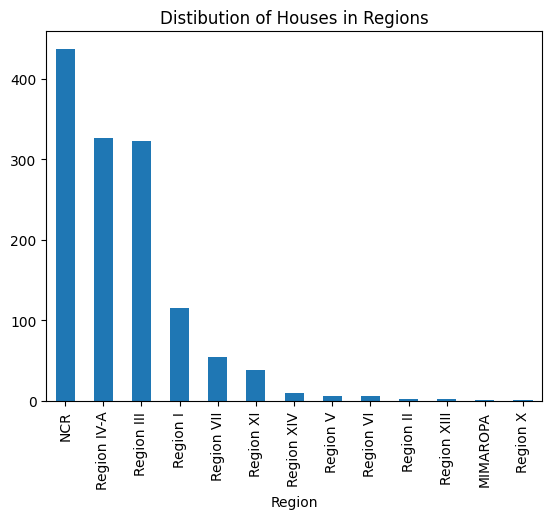

In [6]:
plt.title("Distibution of Houses in Regions")
df['Region'].value_counts().plot(kind='bar')
plt.show()

Most of the houses in the dataset are from NCR, Region IV-A, and Region III.

# Removal of Outliers (Optional)

In [103]:
def plot_upper_lower_bounds_boxplot(ax, data):
    q1 = np.percentile(data, 25, method='midpoint')
    q3 = np.percentile(data, 75, method='midpoint')

    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)

    ax.axhline(y=upper, color='red', linestyle='--')
    ax.axhline(y=lower, color='red', linestyle='--')

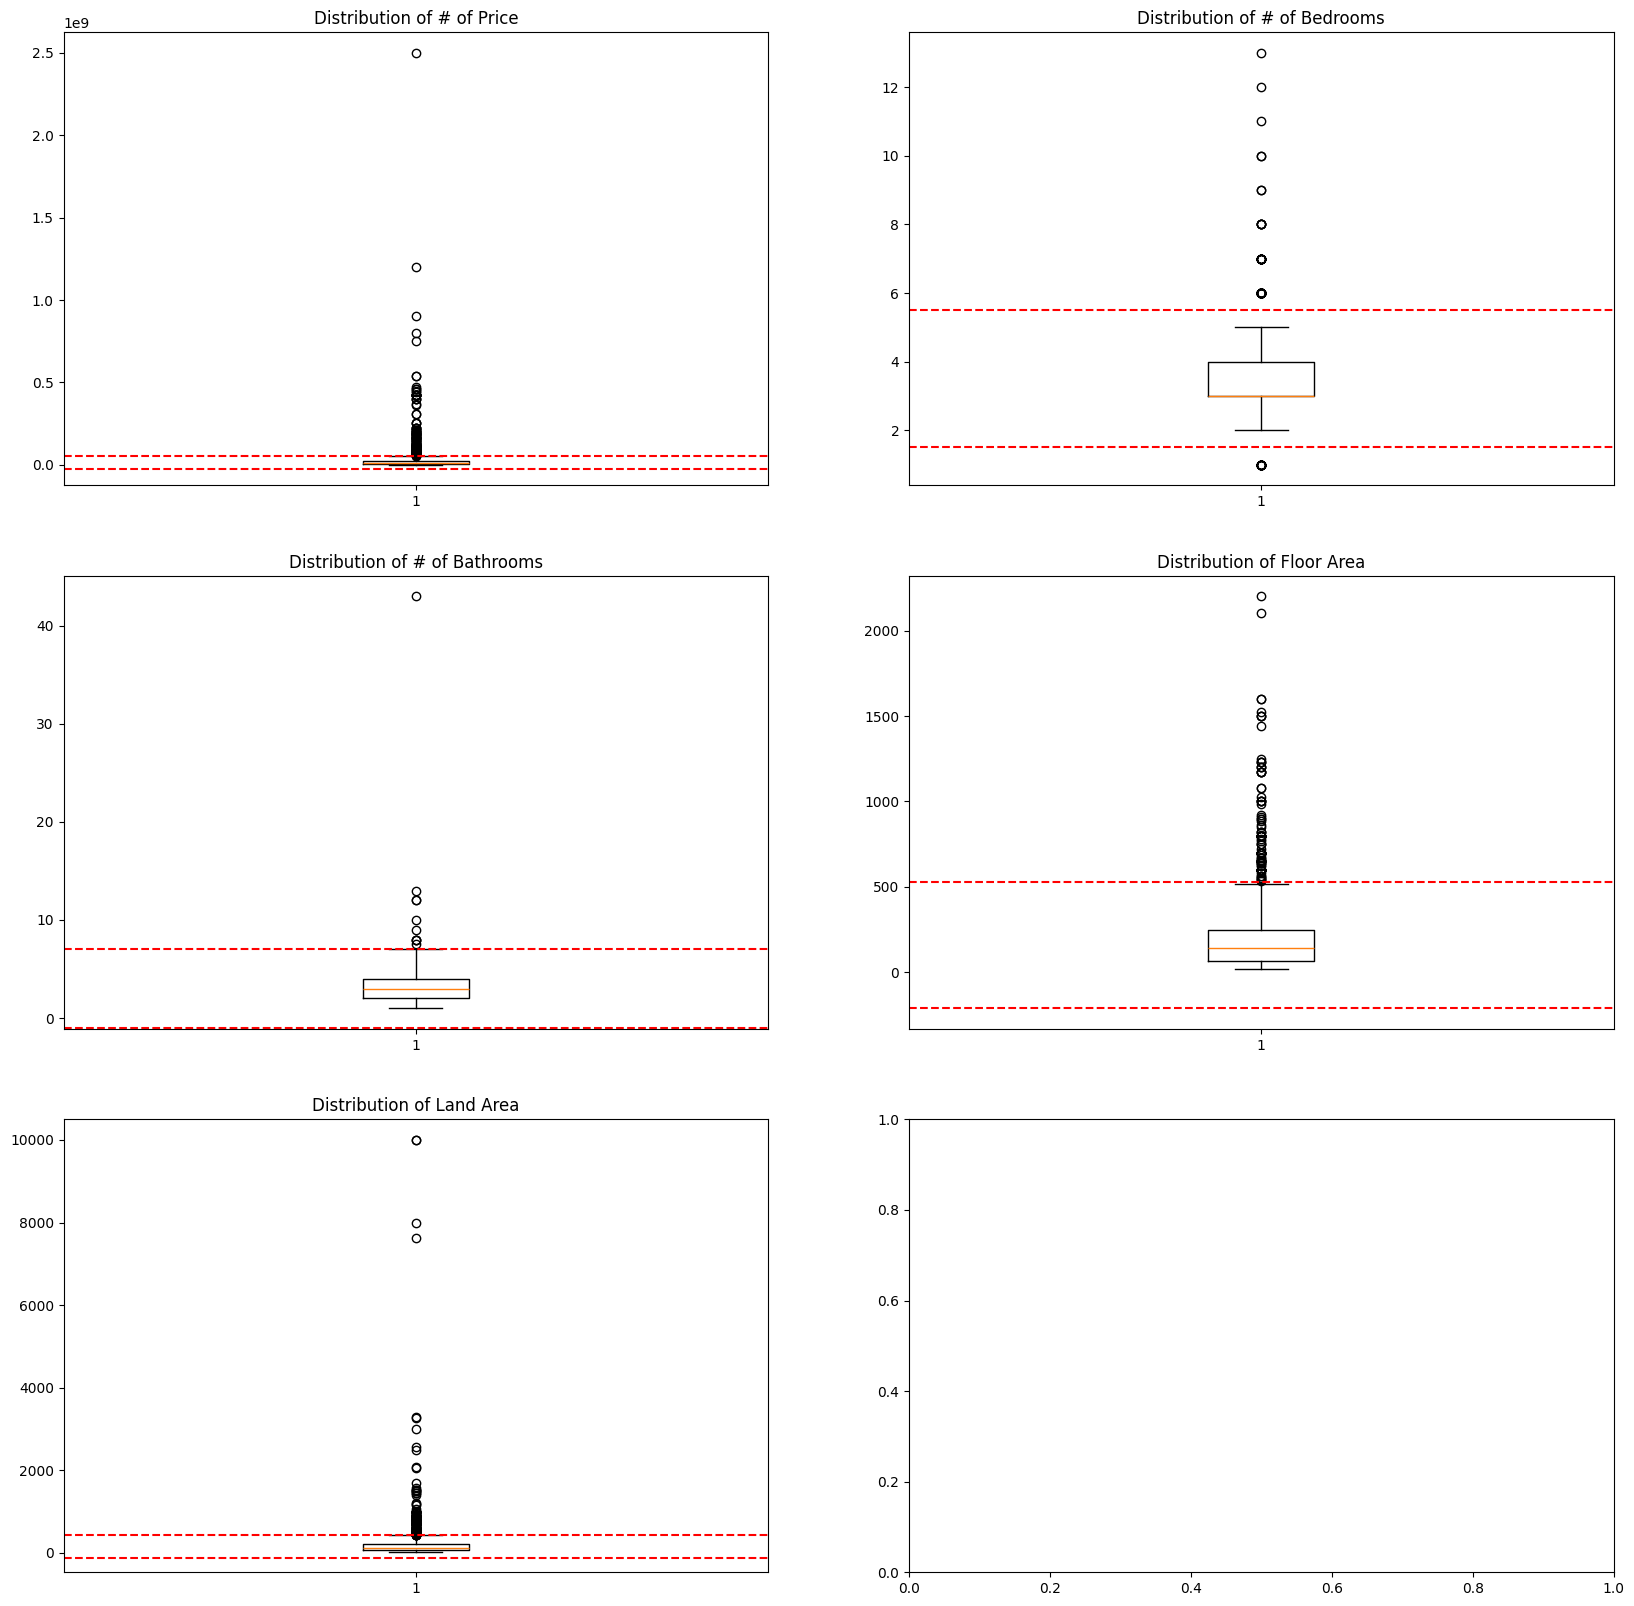

In [104]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

axes[0,0].boxplot(df['Price'])
axes[0,0].set_title('Distribution of # of Price')
axes[0,1].boxplot(df['Bedrooms'])
axes[0,1].set_title('Distribution of # of Bedrooms')
axes[1,0].boxplot(df['Bathrooms'])
axes[1,0].set_title('Distribution of # of Bathrooms')
axes[1,1].boxplot(df['Floor Area'])
axes[1,1].set_title('Distribution of Floor Area')
axes[2,0].boxplot(df['Land Area'])
axes[2,0].set_title('Distribution of Land Area')

for col, ax in zip(df.drop(['Region'], axis=1).columns, axes.flat):
    plot_upper_lower_bounds_boxplot(ax, df[col])

plt.show()

Other features including the house price are negatively skewed. The mode and median are less than the mean.
There seems to be a lot of outliers.

In [105]:
def remove_outliers(col):
    q1 = np.percentile(df[col], 25, method='midpoint')
    q3 = np.percentile(df[col], 75, method='midpoint')

    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)

    upper_indices = np.where(df[col] >= upper)[0]
    lower_indices = np.where(df[col] <= lower)[0]

    try:
        df.drop(index=upper_indices, inplace=True)
        df.drop(index=lower_indices, inplace=True)
        df.reset_index(drop=True, inplace=True)
    except Exception as e:
        print(f"Error: {e}")
    
    print(f"Dropping: {len(upper_indices) + len(lower_indices)} rows in {col}")

In [106]:
for col in df.drop(['Region'], axis=1).columns:
    remove_outliers(col)

Dropping: 147 rows in Price
Dropping: 59 rows in Bedrooms
Dropping: 57 rows in Bathrooms
Dropping: 10 rows in Floor Area
Dropping: 64 rows in Land Area


In [107]:
df.shape

(986, 6)

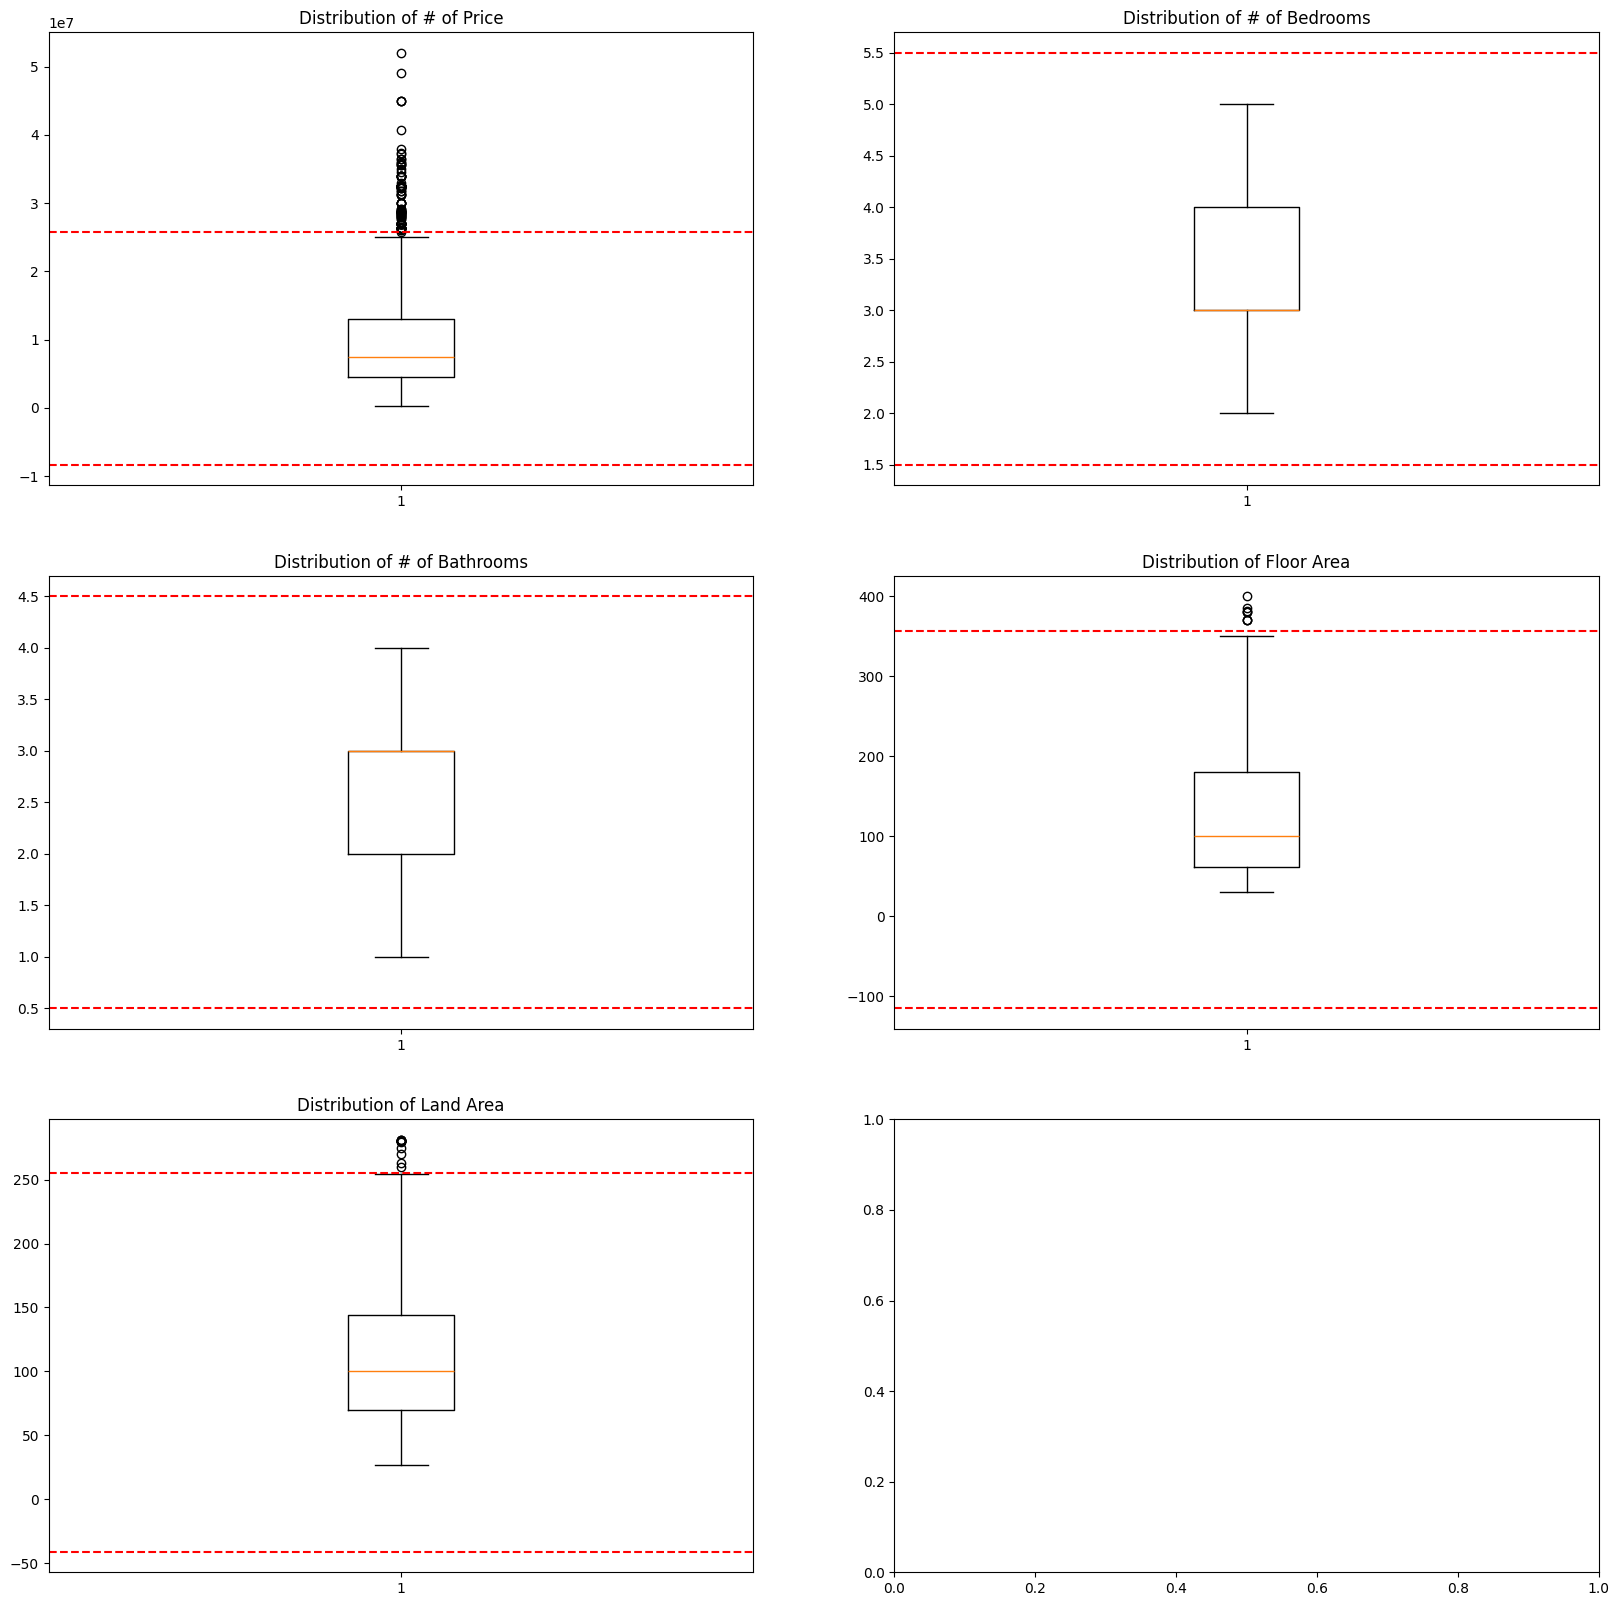

In [108]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

axes[0,0].boxplot(df['Price'])
axes[0,0].set_title('Distribution of # of Price')
axes[0,1].boxplot(df['Bedrooms'])
axes[0,1].set_title('Distribution of # of Bedrooms')
axes[1,0].boxplot(df['Bathrooms'])
axes[1,0].set_title('Distribution of # of Bathrooms')
axes[1,1].boxplot(df['Floor Area'])
axes[1,1].set_title('Distribution of Floor Area')
axes[2,0].boxplot(df['Land Area'])
axes[2,0].set_title('Distribution of Land Area')

for col, ax in zip(df.drop(['Region'], axis=1).columns, axes.flat):
    plot_upper_lower_bounds_boxplot(ax, df[col])

plt.show()

In [109]:
df

,Price,Bedrooms,Bathrooms,Floor Area,Land Area,Region
0,9500000.0,4.0,3.0,144.00,136.0,Region IV-A
1,4400000.0,3.0,2.0,63.20,80.0,Region III
2,7810000.0,5.0,3.0,100.00,110.0,Region III
3,3275000.0,2.0,1.0,40.32,78.4,Region XI
4,1800000.0,2.0,2.0,52.00,40.0,Region III
...,...,...,...,...,...,...
981,52000000.0,3.0,3.0,380.00,162.3,Region I
982,13000000.0,4.0,3.0,230.00,150.0,Region IV-A
983,4500000.0,3.0,2.0,90.00,55.0,Region IV-A
984,45000000.0,4.0,3.0,370.00,200.0,NCR


# Log Transformation

In [39]:
df_copy = df.copy()

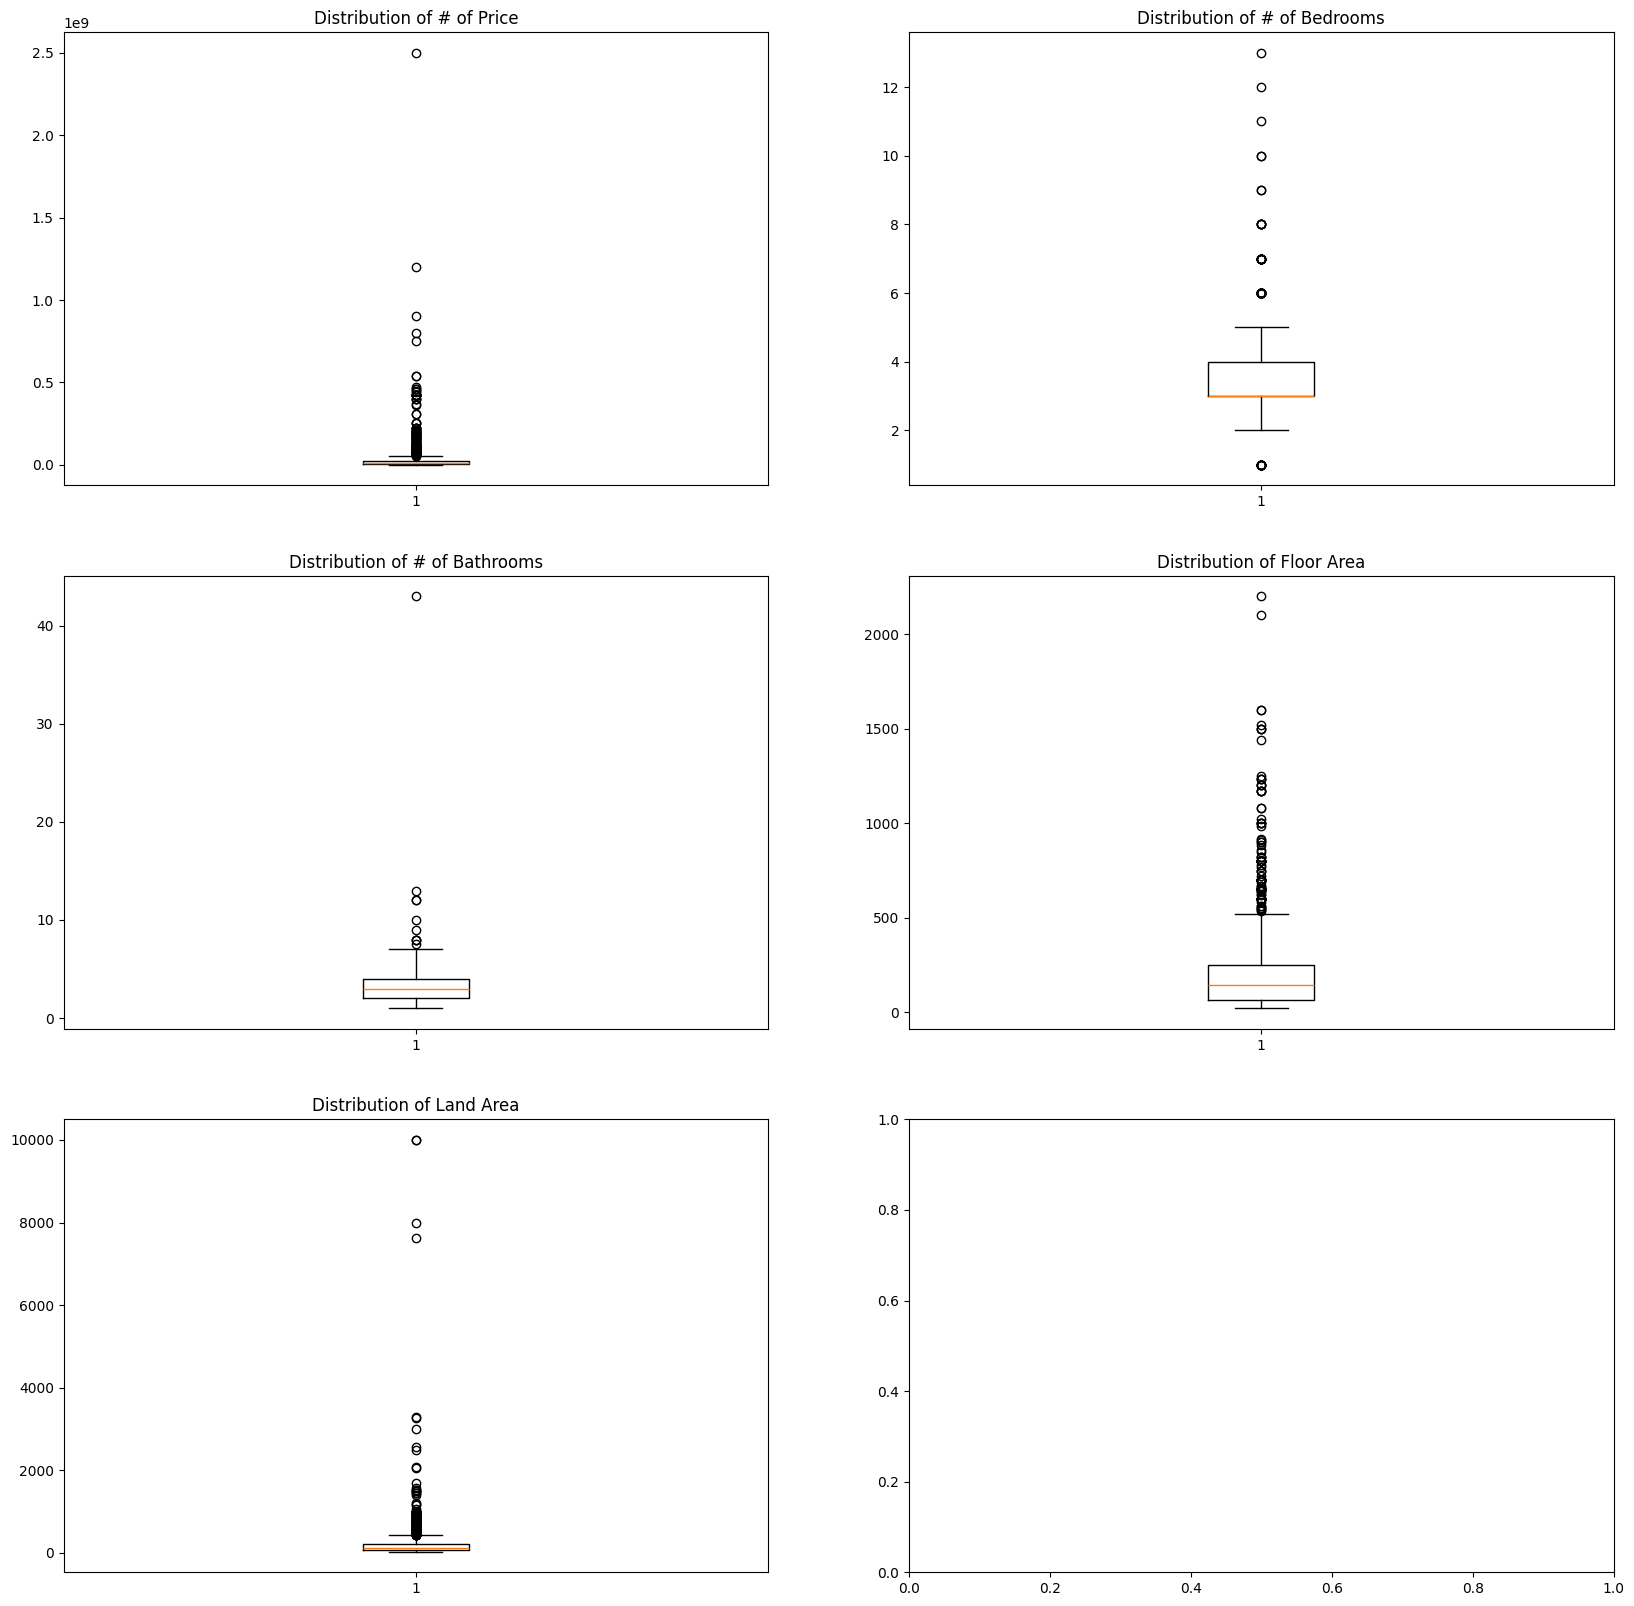

In [40]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

axes[0,0].boxplot(df_copy['Price'])
axes[0,0].set_title('Distribution of # of Price')
axes[0,1].boxplot(df_copy['Bedrooms'])
axes[0,1].set_title('Distribution of # of Bedrooms')
axes[1,0].boxplot(df_copy['Bathrooms'])
axes[1,0].set_title('Distribution of # of Bathrooms')
axes[1,1].boxplot(df_copy['Floor Area'])
axes[1,1].set_title('Distribution of Floor Area')
axes[2,0].boxplot(df_copy['Land Area'])
axes[2,0].set_title('Distribution of Land Area')

plt.show()

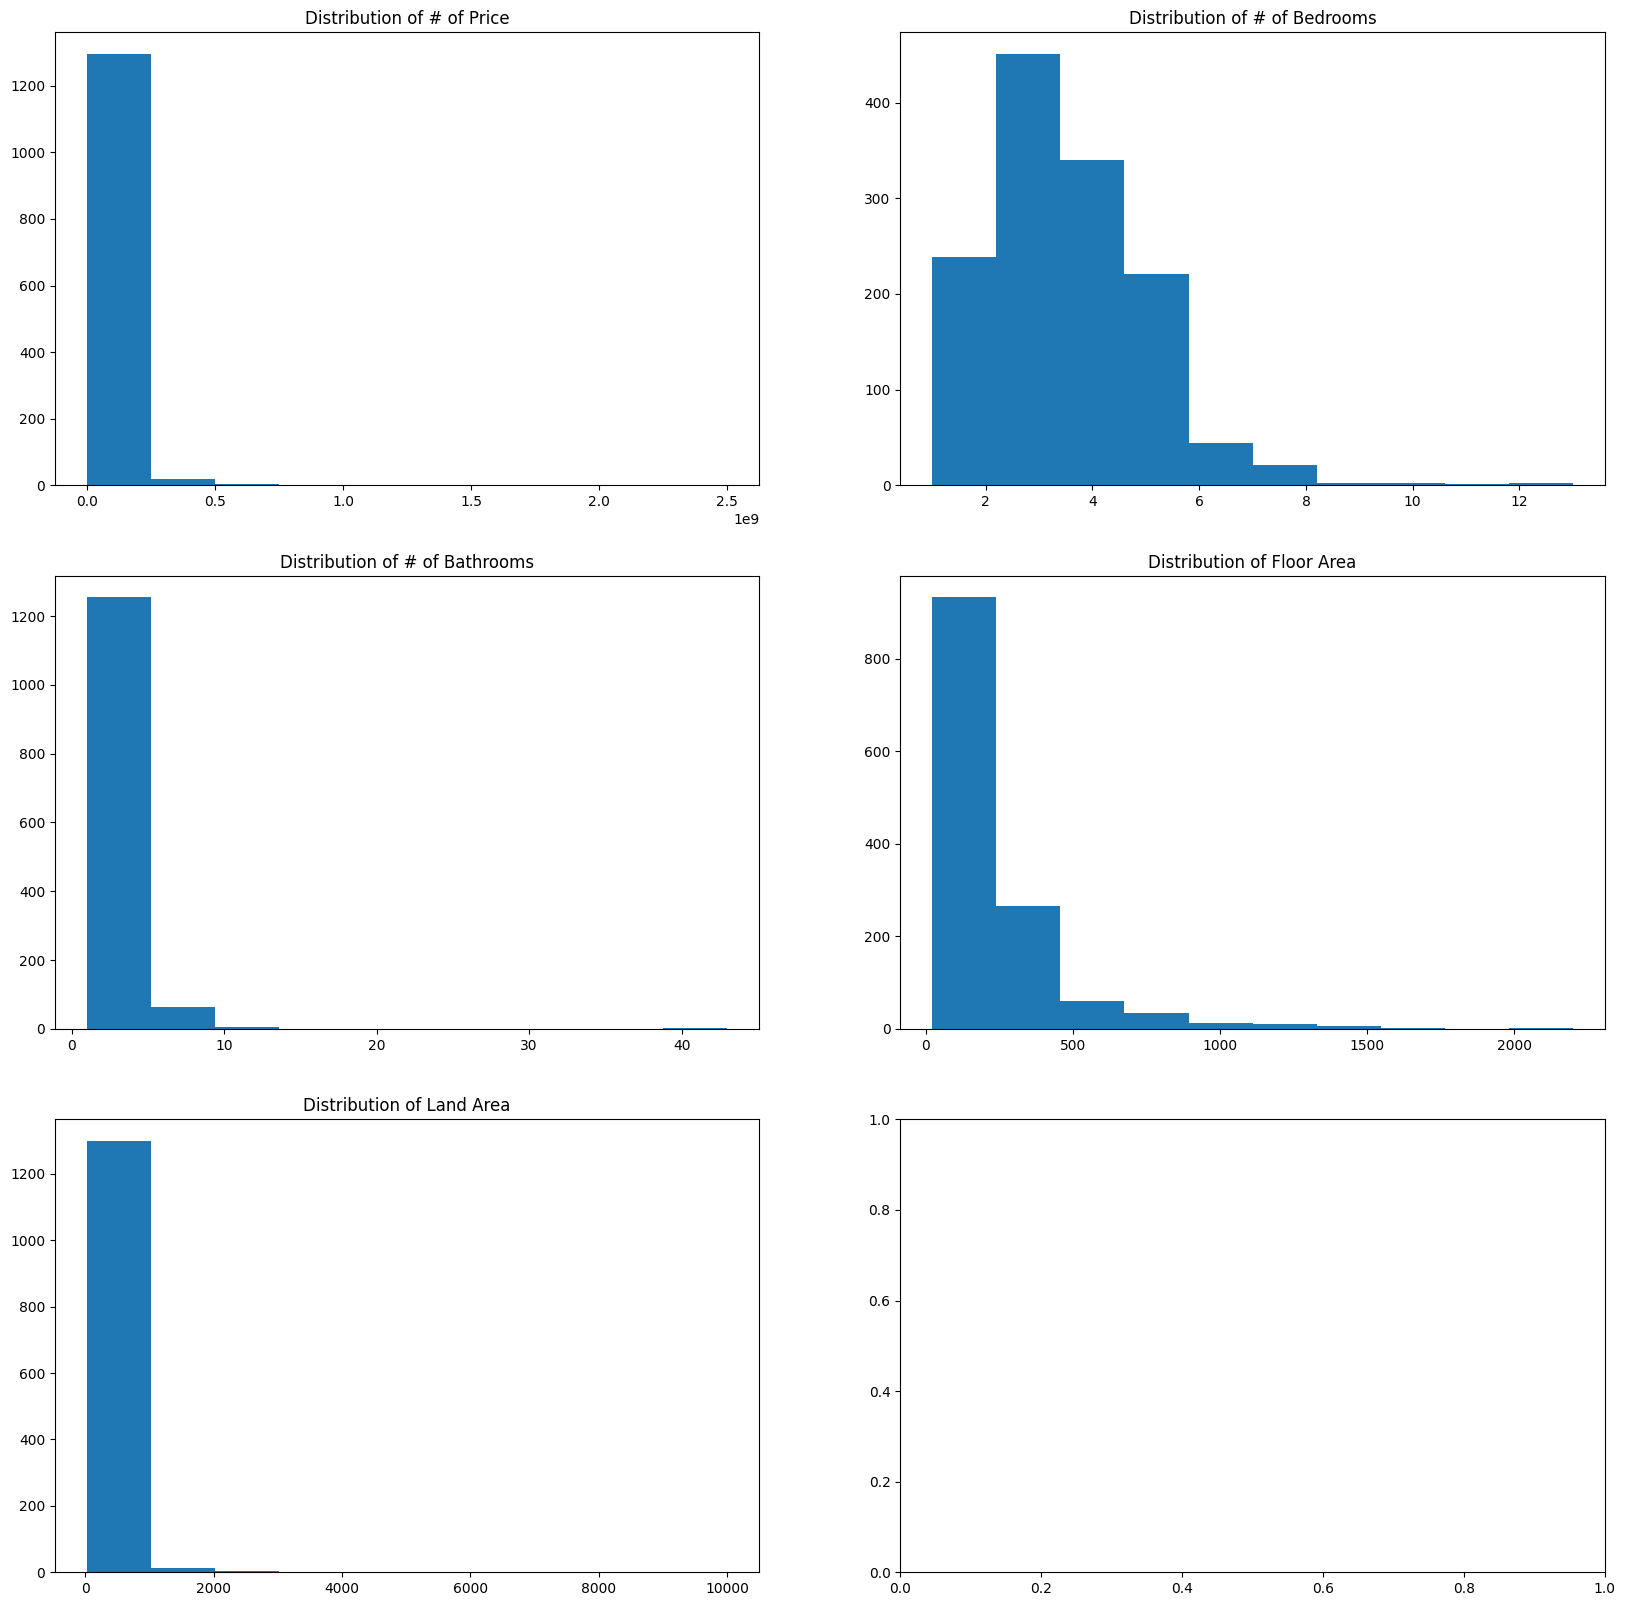

In [41]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

axes[0,0].hist(df_copy['Price'])
axes[0,0].set_title('Distribution of # of Price')
axes[0,1].hist(df_copy['Bedrooms'])
axes[0,1].set_title('Distribution of # of Bedrooms')
axes[1,0].hist(df_copy['Bathrooms'])
axes[1,0].set_title('Distribution of # of Bathrooms')
axes[1,1].hist(df_copy['Floor Area'])
axes[1,1].set_title('Distribution of Floor Area')
axes[2,0].hist(df_copy['Land Area'])
axes[2,0].set_title('Distribution of Land Area')

plt.show()

In [42]:
cols = ['Bedrooms', 'Bathrooms', 'Floor Area', 'Land Area']

for col in cols:
    df_copy[col], _ = yeojohnson(df_copy[col])

In [43]:
df_copy

,Price,Bedrooms,Bathrooms,Floor Area,Land Area,Region
0,9500000.0,1.734458,1.265726,3.176376,2.106811,Region IV-A
1,4400000.0,1.478404,1.021944,2.843786,2.029585,Region III
2,7810000.0,1.947599,1.265726,3.035300,2.077878,Region III
3,3275000.0,1.155943,0.662084,2.640465,2.026311,Region XI
4,1800000.0,1.155943,1.021944,2.757487,1.901119,Region III
...,...,...,...,...,...,...
1318,16000000.0,1.947599,1.021944,3.258066,2.244832,Region IV-A
1319,4500000.0,1.478404,1.021944,2.992730,1.964430,Region IV-A
1320,45000000.0,1.734458,1.265726,3.499337,2.153476,NCR
1321,78000000.0,1.947599,1.593821,3.730229,2.246996,Region IV-A


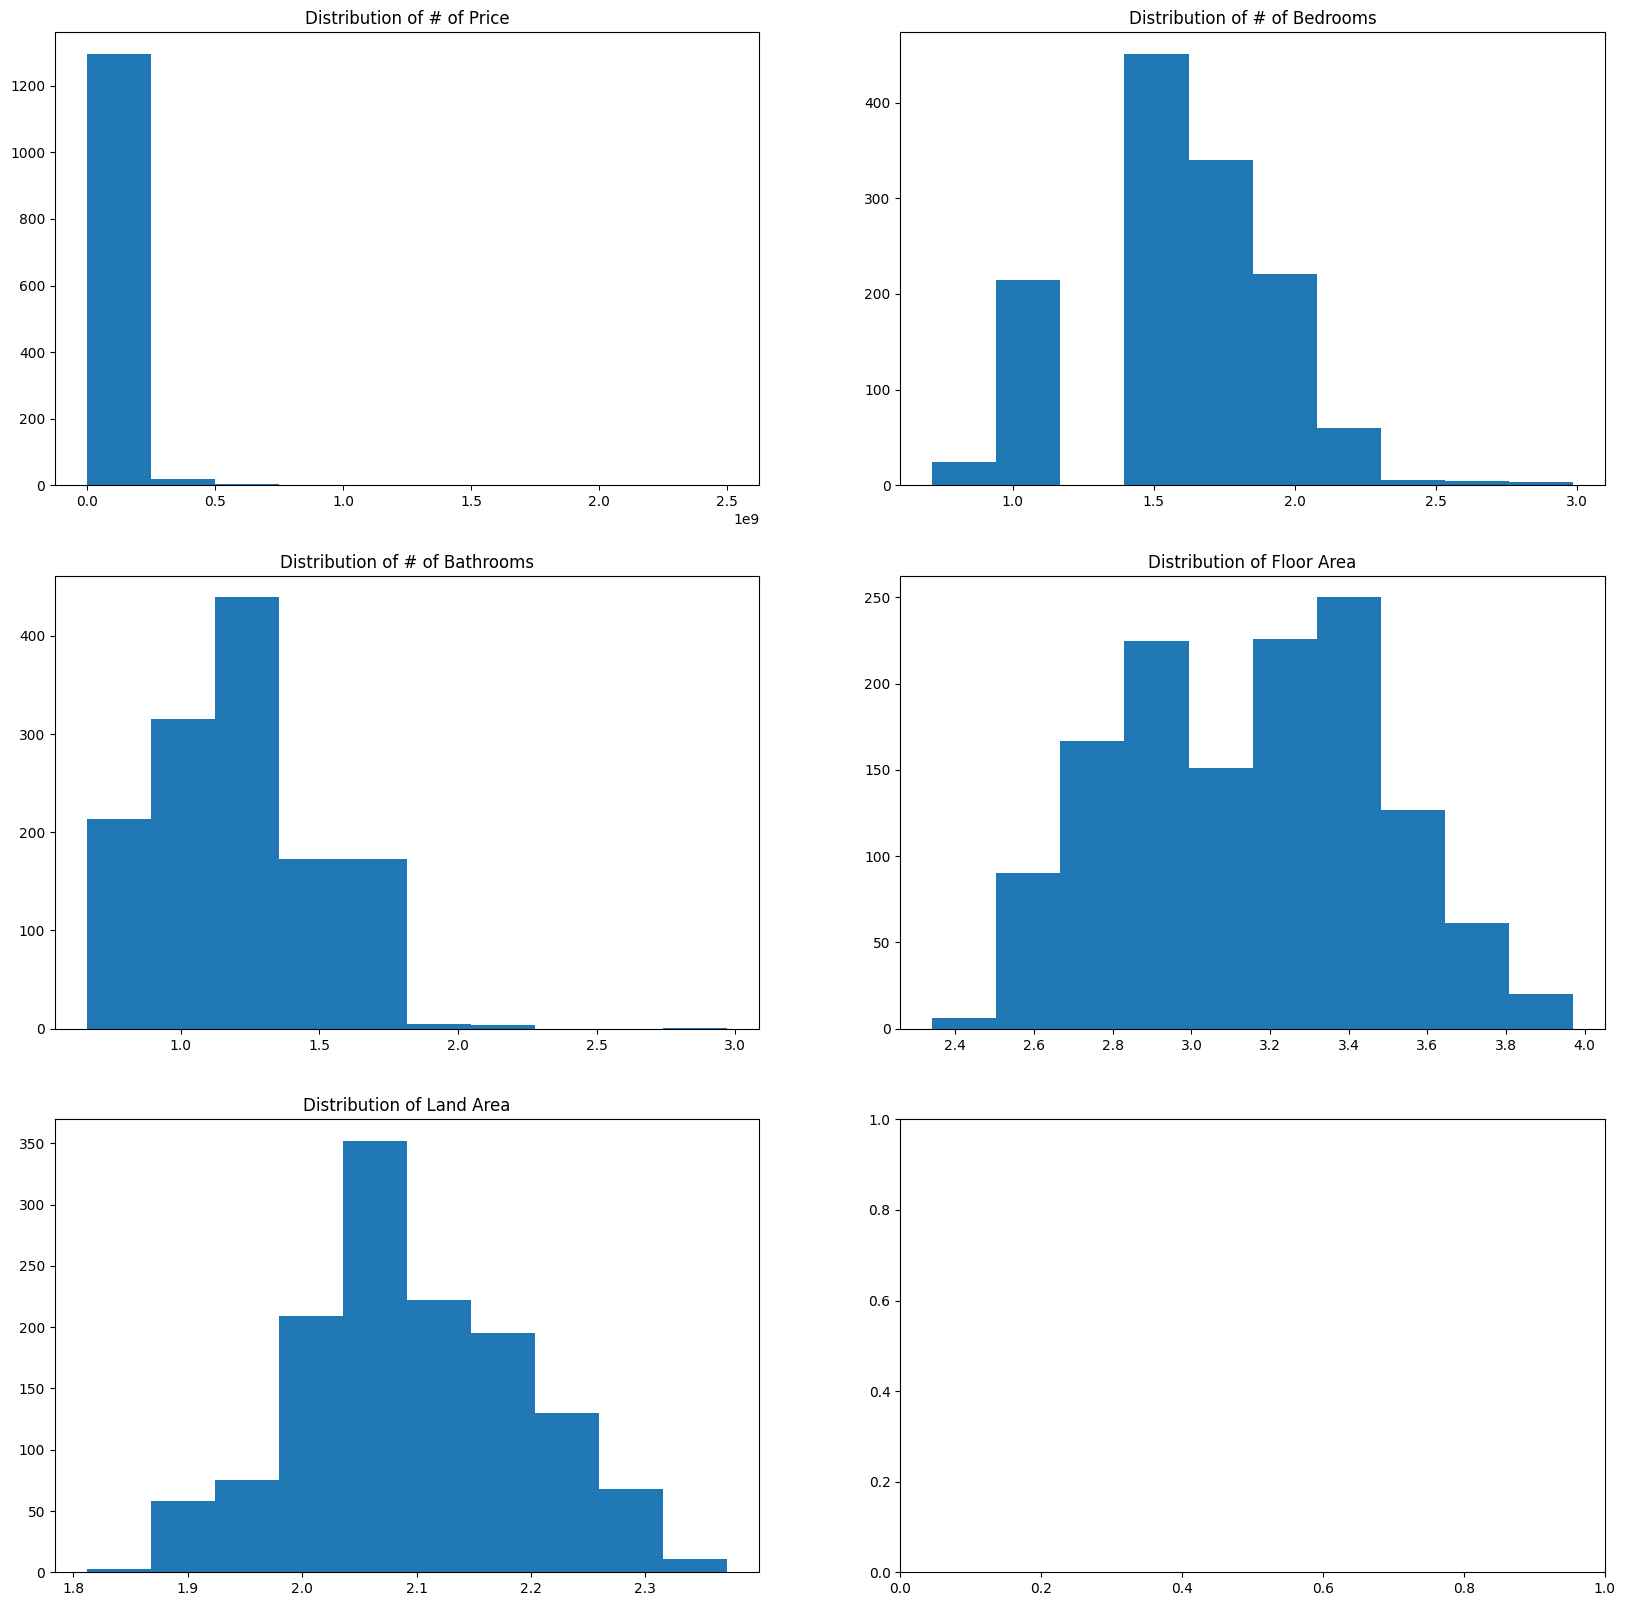

In [44]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

axes[0,0].hist(df_copy['Price'])
axes[0,0].set_title('Distribution of # of Price')
axes[0,1].hist(df_copy['Bedrooms'])
axes[0,1].set_title('Distribution of # of Bedrooms')
axes[1,0].hist(df_copy['Bathrooms'])
axes[1,0].set_title('Distribution of # of Bathrooms')
axes[1,1].hist(df_copy['Floor Area'])
axes[1,1].set_title('Distribution of Floor Area')
axes[2,0].hist(df_copy['Land Area'])
axes[2,0].set_title('Distribution of Land Area')

plt.show()

In [48]:
df_copy.to_csv(os.path.join("..", DATASET_INTERIM_PATH, "log_transformed.csv"), index=False)